In [2]:
#!pip install transformers[agents]

In [138]:
#Generate captions

import os
from transformers import pipeline

image_to_text = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")
path = "/home/fawaz/Documents/private/Tuwaiq/week1_assesment/images/"
images = os.listdir(path)

captions_img_list = []

for i, image in enumerate(images[:15]):
    caption = image_to_text(path + image)
    captions_img_list.append((image,caption))

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


a man in the desert


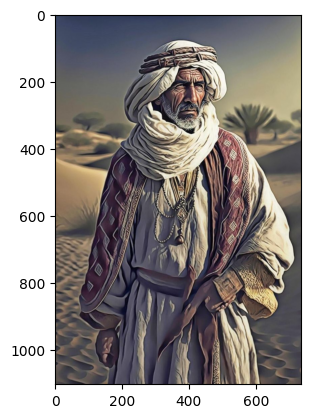

a woman is eating food with her dog


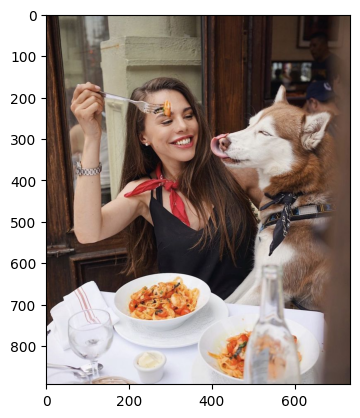

police officers patrol the terminal at the frankfurt airport


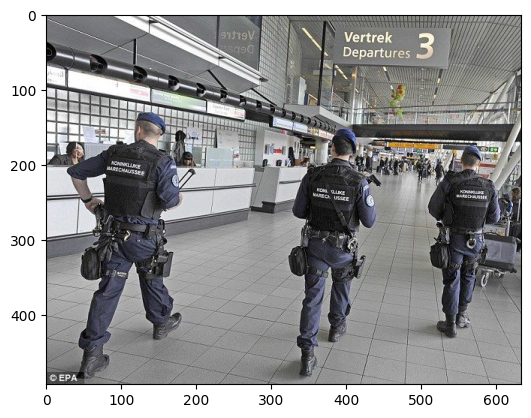

three students studying in the library


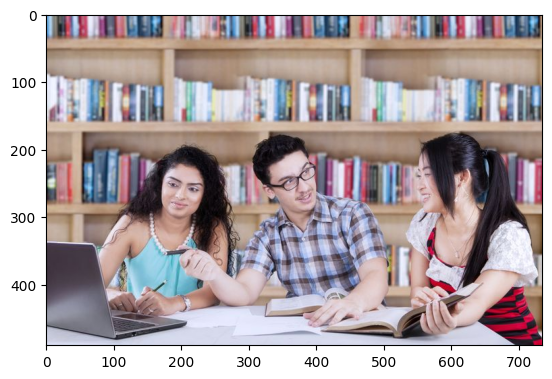

a man riding a white horse on the beach


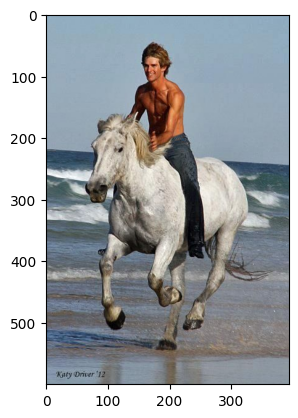

a cup of coffee on a balcony


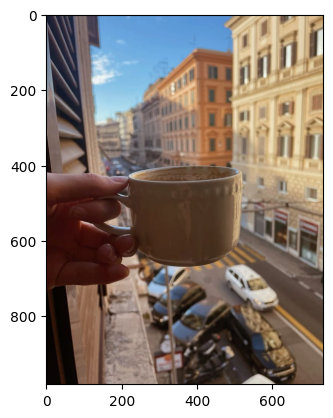

police officers are seen in this und photo


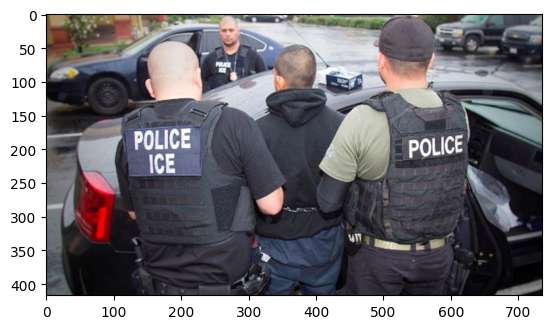

a group of people playing soccer in the rain


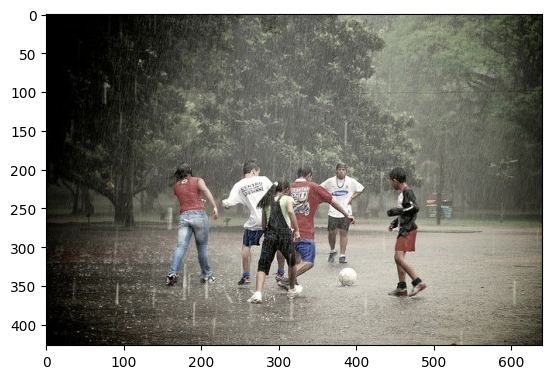

a person holding a cup of coffee in front of the eiff tower


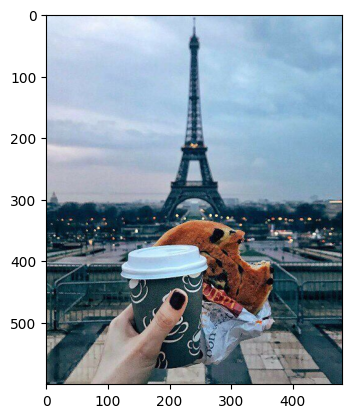

a man riding a horse on the beach


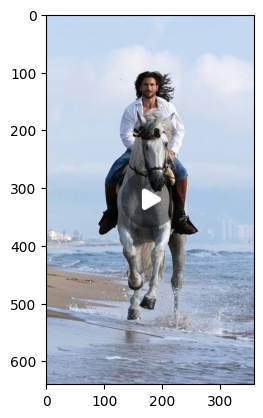

a white and red car parked in front of some tall buildings


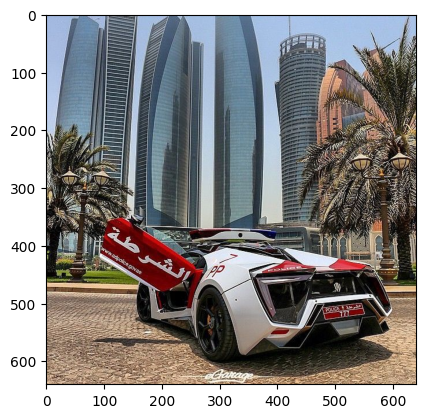

footprints in the sand dunes at sunset, great sand dunes, great sand dunes, great sand dunes


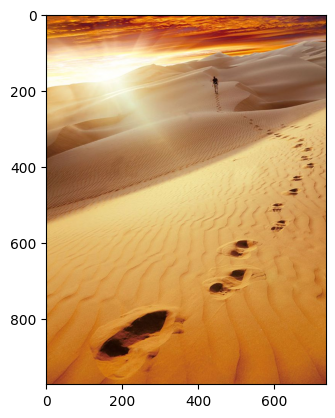

group of children playing soccer in the park


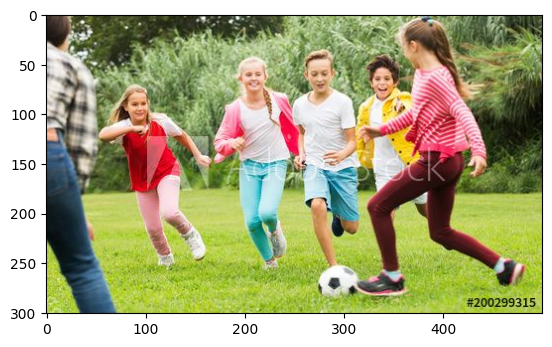

a woman giving a presentation to her colleagues


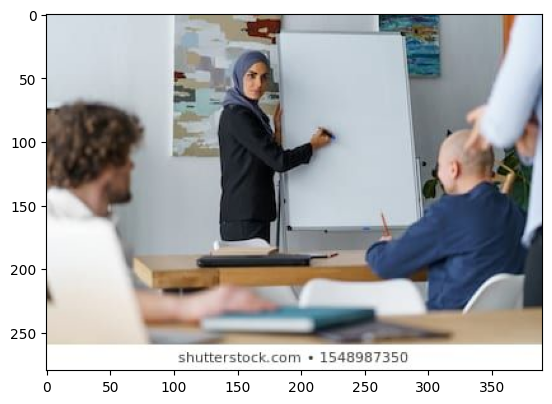

a painting of a soldier kneeling on a rock


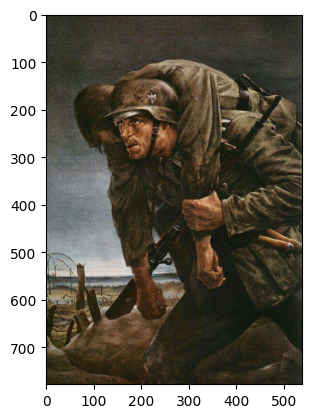

In [146]:
for i, image_caption in enumerate(captions_img_list):
    print(image_caption[1][0]['generated_text'])
    im_array = Image.open(path + image_caption[0])
    plt.show(plt.imshow(im_array))

STATEMENT A dog


A dog


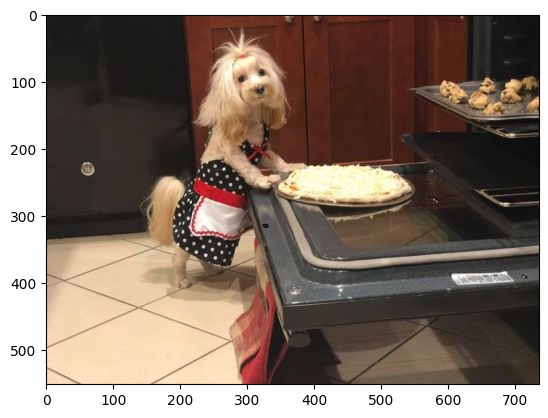

In [145]:
#Search engine
search_sentence = [input('STATEMENT')]
images_arr = [Image.open(path + image) for image in images]

#print(images_arr)
inputs = processor(
    text=search_sentence, images=images_arr,
    return_tensors='pt', padding=True
)

outputs = model(**inputs)

probs = outputs.logits_per_image.argmax(dim=1)

matched_image_index = outputs.logits_per_image.argmax()
print(search_sentence[0])
plt.show(plt.imshow(np.asarray(images_arr[matched_image_index])))


In [ ]:
# Hugging face agents
# Answer: Each agent is deveolped to do specific action in the hugging face

# Hugging face pipeline for text generation
# It can gives you text generation task without the need to specify the NLP preprocessing stes like tokenization etc...

# HF inference endpoints
# you can deploy your model using inference endpoints using fully managed inftrastructure 

# Give feedback on the image generation and explore different models available on the Hugging Face website
# the generated captions using the huggingface are amazing, I have tried GPT2 and blip to generate image captions, but Blip was the good one comparing to GPT2